In [1]:
import pandas as pd
import numpy as np

def clean_and_process_csv(input_file, output_file):
 
    df = pd.read_csv(input_file, sep=';', encoding='utf-8', engine='python')
    
    

    # 1. Eliminar filas con todos los valores NaN
    df = df.dropna(how='all')
    
    # 2. Reemplace las cadenas vacías con NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)
    
    # 3. Convertir columnas numéricas a tipos de datos apropiados
    # Identificar columnas numéricas (excluidas las primeras 4 columnas)
    numeric_columns = df.columns[4:]
    
    # Convertir columnas numéricas a flotantes, convertir errores a NaN
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # 4. Manejar posibles filas duplicadas
    df = df.drop_duplicates()
    
    # 5. Filtrar por país específico (Guatemala)
    df_guatemala = df[df['Country Name'] == 'Guatemala']
    
    # 6. Opcional: eliminar columnas con todos los valores NaN
    df_guatemala = df_guatemala.dropna(axis=1, how='all')
    
    
    df_guatemala.to_csv(output_file, sep=';', encoding='utf-8', index=False)
    
    
    print("Original DataFrame shape:", df.shape)
    print("Guatemala DataFrame shape:", df_guatemala.shape)
    print("Columns in processed DataFrame:", list(df_guatemala.columns))


input_file = 'CSV_SIN_ANALIZAR/Datos_Supervivencia.csv'
output_file = 'CSV_LIMPIOS/Guatemala_Supervivencia_Limpio.csv'

clean_and_process_csv(input_file, output_file)

print("Limpieza y extracción de datos completada. Verificar 'CSV_LIMPIOS/Guatemala_Supervivencia_Limpio.csv'.")


Original DataFrame shape: (266, 67)
Guatemala DataFrame shape: (1, 67)
Columns in processed DataFrame: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
Limpieza y extracción de datos completada. Verificar 'CSV_LIMPIOS/Guatemala_Supervivencia_Limpio.csv'.


Estadísticas básicas:
count    63.000000
mean     63.933953
std      13.914469
min      37.053553
25%      53.711552
50%      67.467657
75%      75.554867
max      79.646451
Name: Value, dtype: float64


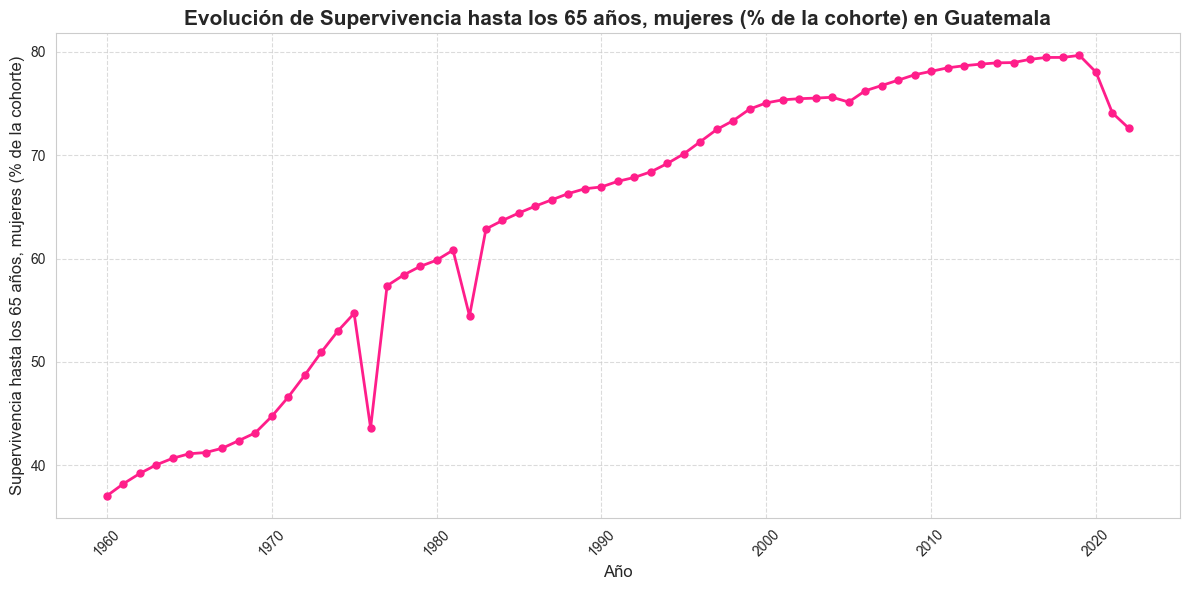

Visualización completada. Revisa GRAFICAS/Guatemala_Supervivencia_Grafica.png'.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_guatemala_data(input_file):
    
    df = pd.read_csv(input_file, sep=';', encoding='utf-8', engine='python')
    
    # Convertir el dataframe para que los años estén en una sola columna
    df_melted = df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                        var_name='Year', 
                        value_name='Value')
    
    # Convertir el año a numérico y ordenar
    df_melted['Year'] = pd.to_numeric(df_melted['Year'], errors='coerce')
    df_melted = df_melted.dropna(subset=['Year', 'Value'])
    df_melted = df_melted.sort_values('Year')
    
    # Configurar la gráfica con un estilo mejorado
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")
    
    # Crear el gráfico de líneas
    plt.plot(df_melted['Year'], df_melted['Value'], 
             marker='o',  # Agregar marcadores para cada punto de datos
             linestyle='-',  # Línea sólida
             linewidth=2,  # Línea ligeramente más gruesa
             markersize=5,  # Tamaño de los marcadores
             color='#ff1e8a')  # Cambiar el color a rosa
    
    # Personalizar el gráfico
    plt.title(f"Evolución de {df_melted['Indicator Name'].iloc[0]} en Guatemala", 
              fontsize=15, 
              fontweight='bold')
    plt.xlabel('Año', fontsize=12)
    plt.ylabel(df_melted['Indicator Name'].iloc[0], fontsize=12)
    
    # Rotar las etiquetas del eje x para una mejor legibilidad
    plt.xticks(rotation=45)
    
    # Agregar cuadrícula para una mejor legibilidad
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Ajustar diseño para evitar cortar etiquetas
    plt.tight_layout()
    
   
    plt.savefig('GRAFICAS/Guatemala_Supervivencia_Grafica.png', dpi=300)
    
 
    print("Estadísticas básicas:")
    print(df_melted['Value'].describe())
    
    
    plt.show()

input_file = 'CSV_LIMPIOS/Guatemala_Supervivencia_Limpio.csv'
visualize_guatemala_data(input_file)

print("Visualización completada. Revisa GRAFICAS/Guatemala_Supervivencia_Grafica.png'.")
